Size of training set: 11,094 records

Size of test set: 2,774 records

FEATURES:

Restaurant: A unique ID that represents a restaurant.

Location: The location of the restaurant.

Cuisines: The cuisines offered by the restaurant.

Average_Cost: The average cost for one person/order.

Minimum_Order: The minimum order amount.

Rating: Customer rating for the restaurant.

Votes: The total number of customer votes for the restaurant.

Reviews: The number of customer reviews for the restaurant.

Delivery_Time: The order delivery time of the restaurant. (Target Classes)

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import re
from tqdm import tqdm

In [2]:
#Loading data
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Data_Test.xlsx")

# Train data

In [3]:

#display the dataframe head(10) returns the first 10 rows
train.head(10)



,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",₹150,₹50,3.8,46,18,30 minutes
6,ID_3777,Mumbai Central,"Beverages, Fast Food",₹150,₹50,3.7,108,31,30 minutes
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",₹650,₹50,4.0,1731,1235,45 minutes
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",₹100,₹50,3.9,110,26,30 minutes
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",₹200,₹50,3.9,562,294,65 minutes


In [4]:
#Shape of a table (number or rows, number of columns)
train.shape



(11094, 9)

In [5]:
#Display the names of all columns in a dataframe
train.columns



Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [6]:
#Number of null values or empty cells present in each of the column
train.isnull().sum()



Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [7]:
#Displays stastical information about each of the columns eg. count, frequency of occurance of a value etc
train.describe(include = 'all')



,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094,11094,11094,11094,11094,11094,11094,11094,11094
unique,7480,35,2179,26,18,33,1103,761,7
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,22,947,850,3241,10118,1191,2074,2312,7406


In [8]:
#Displays each of the column along with its type and the memory used by the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.1+ KB


# Test Data

In [9]:
test.shape

(2774, 8)

In [10]:
test.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14
5,ID_506,"Yerawada, Pune, Maharashtra","North Indian, Chinese",₹100,₹50,3.4,16,11
6,ID_8321,"Raja Bazar, Kolkata","South Indian, Fast Food",₹200,₹50,3.3,72,10
7,ID_4559,"Sector 3, Marathalli","Kerala, South Indian, Chinese",₹150,₹50,3.8,46,29
8,ID_7982,"Sector 1, Noida",North Indian,₹200,₹50,NEW,-,-
9,ID_2869,"D-Block, Sector 63, Noida",Mithai,₹200,₹50,3.2,5,2


In [11]:
test.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews'],
      dtype='object')

In [12]:
#Number of null values or empty cells present in each of the column
test.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64

In [13]:
#Displays stastical information about each of the columns eg. count, frequency of occurance of a value etc
test.describe(include = 'all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,2774,2774,2774,2774,2774,2774,2774,2774
unique,2401,35,881,19,9,30,580,392
top,ID_1209,"D-Block, Sector 63, Noida",North Indian,₹200,₹50,-,-,-
freq,8,221,226,820,2556,305,542,593


In [14]:
#Displays each of the column along with its type and the memory used by the data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 8 columns):
Restaurant       2774 non-null object
Location         2774 non-null object
Cuisines         2774 non-null object
Average_Cost     2774 non-null object
Minimum_Order    2774 non-null object
Rating           2774 non-null object
Votes            2774 non-null object
Reviews          2774 non-null object
dtypes: object(8)
memory usage: 173.5+ KB


# Data Cleaning 

We will consider the following features of training and test datasets. Here I have grouped the columns based on similarity of values which will make it easy for cleaning.

Cleaning Average_Cost & Minimum_order columns to remove special characters and make them float variables.
Location & Cuisines are categoriacal variables that needs to be cleaned before encoding.
Rating, Votes & Reviews needs to be cleaned and converted to respective types.

Average_Cost & Minimum_order

In [15]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [16]:
#Finding the unique values in Average_Cost
train['Average_Cost'].unique()

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

The Average_Cost has an invalid value in one of its rows. We will replace it with 200 which is the most frequent value in the column.(Check the train.describe() method). We will add 200 as a string and not as an integer as the column is of type object and all its values are strings.

In [17]:

train[train['Average_Cost'] == 'for']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
6297,ID_6472,Pune University,Fast Food,for,₹50,NEW,-,-,30 minutes


In [18]:

#replacing 'for' with 200
train['Average_Cost'].replace('for', '200', inplace = True)

Now we will clean all the values and will convert it in to integer.

In [19]:
train['Average_Cost_Cleaned'] = train['Average_Cost'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [20]:

train['Average_Cost_Cleaned'].unique()

array([ 200,  100,  150,  250,  650,  350,  800,   50,  400,  600,  300,
        750,  450,  550, 1000,  500,  900, 1200,  950,  850,  700, 1150,
       1100, 1400, 2050], dtype=int64)

We can see that all the special characters ahave been removed and strings have been converted to integers.

Let's perform the same operations on the test set

In [21]:

test['Average_Cost'].unique()

array(['₹350', '₹100', '₹200', '₹150', '₹300', '₹50', '₹250', '₹500',
       '₹650', '₹400', '₹550', '₹450', '₹600', '₹750', '₹850', '₹1,000',
       '₹700', '₹800', '₹1,200'], dtype=object)

In [22]:

test['Average_Cost_Cleaned'] = test['Average_Cost'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [23]:
test['Average_Cost_Cleaned'].unique()

array([ 350,  100,  200,  150,  300,   50,  250,  500,  650,  400,  550,
        450,  600,  750,  850, 1000,  700,  800, 1200], dtype=int64)


Now lets do the same for Minimum_Order column

In [24]:

train['Minimum_Order'].unique()

array(['₹50', '₹99', '₹0', '₹200', '₹450', '₹350', '₹79', '₹400', '₹199',
       '₹500', '₹250', '₹150', '₹90', '₹299', '₹300', '₹240', '₹89',
       '₹59'], dtype=object)

In [25]:

train['Minimum_Order_Cleaned'] = train['Minimum_Order'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [26]:

test['Minimum_Order'].unique()

array(['₹50', '₹99', '₹500', '₹0', '₹200', '₹149', '₹199', '₹399', '₹89'],
      dtype=object)

In [27]:
test['Minimum_Order_Cleaned'] = test['Minimum_Order'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [28]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99


Location & CUISINES

Location and Cuisines are categorical variables that need to be encoded later. By looking at the dataset, we can see that each of these columns have multiple values in them. We can use each of them as a feature by splitting each column into n number of features. To do that we will first find the maximum number(n) of features a column has in the entire dataset including both test and train data. Once the maximum number of features within a cell is found, we will split all the rows in the dataset for that specific column into n features.

In [29]:
#A function to find the maximun number of features in a single cell
def max_features_in_single_row(train, test, delimiter):
  max_info = 0 
  item_lis = list(train.append(test))
  for i in item_lis:
    if len(i.split("{}".format(delimiter))) > max_info:
      max_info = len(i.split("{}".format(delimiter)))
  print("\n","-"*35)    
  print("Max_Features in One Observation = ", max_info)
  return max_info

In [30]:
#This function splits a column in to n features where n is the maximum number of features in a single cell
def feature_splitter(feat, name, delimiter, max_info):
  item_lis = list(feat)
  extracted_features = {}
  for i in range(max_info):
    extracted_features['{}_Feature_{}'.format(name, i+1)] = []
  print("-"*35)
  print("Features Dictionary : ", extracted_features)
  #tqdm is a graphics module that helps us see the progress bar
  for i in tqdm(range(len(item_lis))):
    for j in range(max_info):  
      try:
        extracted_features['{}_Feature_{}'.format(name,j+1)].append(item_lis[i].split("{}".format(delimiter))[j].lower().strip())
      except: 
        extracted_features['{}_Feature_{}'.format(name, j+1)].append(np.nan)

  return extracted_features

In [31]:

#Splitting Location
loc_max = max_features_in_single_row(test['Location'],train['Location'], ',')
train_Location_splits = feature_splitter(train['Location'], 'Location', ',', loc_max)
test_Location_splits = feature_splitter(test['Location'], 'Location', ',', loc_max)


 -----------------------------------
Max_Features in One Observation =  4
-----------------------------------
Features Dictionary :  {'Location_Feature_1': [], 'Location_Feature_2': [], 'Location_Feature_3': [], 'Location_Feature_4': []}


100%|██████████| 11094/11094 [00:00<00:00, 65316.23it/s]


-----------------------------------
Features Dictionary :  {'Location_Feature_1': [], 'Location_Feature_2': [], 'Location_Feature_3': [], 'Location_Feature_4': []}


100%|██████████| 2774/2774 [00:00<00:00, 62965.40it/s]


In [32]:
#Splitting Cuisines
cus_max = max_features_in_single_row(test['Cuisines'],train['Cuisines'], ',')
train_Cuisines_splits = feature_splitter(train['Cuisines'], 'Cuisines', ',', cus_max)
test_Cuisines_splits = feature_splitter(test['Cuisines'], 'Cuisines', ',', cus_max)


 -----------------------------------
Max_Features in One Observation =  8
-----------------------------------
Features Dictionary :  {'Cuisines_Feature_1': [], 'Cuisines_Feature_2': [], 'Cuisines_Feature_3': [], 'Cuisines_Feature_4': [], 'Cuisines_Feature_5': [], 'Cuisines_Feature_6': [], 'Cuisines_Feature_7': [], 'Cuisines_Feature_8': []}


100%|██████████| 11094/11094 [00:00<00:00, 38847.98it/s]


-----------------------------------
Features Dictionary :  {'Cuisines_Feature_1': [], 'Cuisines_Feature_2': [], 'Cuisines_Feature_3': [], 'Cuisines_Feature_4': [], 'Cuisines_Feature_5': [], 'Cuisines_Feature_6': [], 'Cuisines_Feature_7': [], 'Cuisines_Feature_8': []}


100%|██████████| 2774/2774 [00:00<00:00, 43279.98it/s]


Rating, Votes & Reviews

We will now clean Rating, Votes & Reviews columns to remove invalid values and to convert them to the right type.

In [33]:

train.describe(include = 'all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
count,11094,11094,11094,11094,11094,11094,11094,11094,11094,11094.000000,11094.000000
unique,7480,35,2179,26,18,33,1103,761,7,NaN,NaN
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes,NaN,NaN
freq,22,947,850,3241,10118,1191,2074,2312,7406,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.708671,53.344511
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.833261,18.551245
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,50.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,50.000000


In [34]:
#A function to find all the non numeric values
def non_numerals(series):
  non_numerals = []
  for i in series.unique():
    try :
      i = float(i)
    except:
      non_numerals.append(i)
  return non_numerals

In [35]:
# A function to replace the non-numeric values
def replace_nn_with(series, type_, fill_with = None, method = 'mean'):

  nn = non_numerals(series)
  print('-'*30)
  print('-'*30)
  print("Non Numerals in column ",series.name," : ",nn)

  series = series.replace(nn, np.nan, inplace = False)
  nulls = series.isnull().sum()
  if fill_with:
    series.fillna(fill_with, inplace = True)
    print("Filling Non Numerals with {}".format(fill_with))
  
  else:
    series = series.replace(nn, np.nan, inplace = False)

    if method == 'mean' :
      rep = series.astype(float).mean()
      print("Filling Non Numerals with MEAN = ", rep)

    elif method == 'median' :
      rep = series.astype(float).median()
      print("Filling Non Numerals with MEDIAN = ", rep)

    elif method == 'min' :
      rep = series.astype(float).min()
      print("Filling Non Numerals with MINIMUM = ", rep)

    else:
      print('Please pass a valid method as a string -- ("mean" or "median" or "min")')
      return 0

    series.fillna(rep, inplace = True)
    
  try:
    series = series.astype(type_)
    print(nulls, ": observations replaced")
    return series
  except:
    # Since type conversion of a string containting decimals to int is not possible, it is first converted to float
    series =  series.astype(float)
    print(nulls, ": observations replaced")
    series =  series.astype(type_)
    return series

In [36]:
train.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",₹150,₹50,3.8,46,18,30 minutes,150,50
6,ID_3777,Mumbai Central,"Beverages, Fast Food",₹150,₹50,3.7,108,31,30 minutes,150,50
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",₹650,₹50,4.0,1731,1235,45 minutes,650,50
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",₹100,₹50,3.9,110,26,30 minutes,100,50
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",₹200,₹50,3.9,562,294,65 minutes,200,50



Lets Clean the columns

In [37]:
train['Rating_Cleaned'] = replace_nn_with(train['Rating'],float, method = 'mean')

------------------------------
------------------------------
Non Numerals in column  Rating  :  ['-', 'NEW', 'Opening Soon', 'Temporarily Closed']
Filling Non Numerals with MEAN =  3.6134596429744668
1963 : observations replaced


In [38]:
train.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50,3.5
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50,3.5
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50,3.6
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99,3.7
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99,3.2
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",₹150,₹50,3.8,46,18,30 minutes,150,50,3.8
6,ID_3777,Mumbai Central,"Beverages, Fast Food",₹150,₹50,3.7,108,31,30 minutes,150,50,3.7
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",₹650,₹50,4.0,1731,1235,45 minutes,650,50,4.0
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",₹100,₹50,3.9,110,26,30 minutes,100,50,3.9
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",₹200,₹50,3.9,562,294,65 minutes,200,50,3.9


In [39]:
test['Rating_Cleaned'] = replace_nn_with(test['Rating'],float, fill_with = 3.6134596429744668)

------------------------------
------------------------------
Non Numerals in column  Rating  :  ['NEW', '-', 'Opening Soon']
Filling Non Numerals with 3.6134596429744668
507 : observations replaced


In [40]:
train['Votes_Cleaned'] = replace_nn_with(train['Votes'],int,method =  'mean')


------------------------------
------------------------------
Non Numerals in column  Votes  :  ['-']
Filling Non Numerals with MEAN =  244.54445676274943
2074 : observations replaced


In [41]:

test['Votes_Cleaned'] = replace_nn_with(test['Votes'],int,fill_with = 244.54445676274943)

------------------------------
------------------------------
Non Numerals in column  Votes  :  ['-']
Filling Non Numerals with 244.54445676274943
542 : observations replaced


In [42]:
train['Reviews_Cleaned'] = replace_nn_with(train['Reviews'],int, method =  'mean')

------------------------------
------------------------------
Non Numerals in column  Reviews  :  ['-']
Filling Non Numerals with MEAN =  123.24789341835573
2312 : observations replaced


In [43]:

test['Reviews_Cleaned'] = replace_nn_with(test['Reviews'],int, method =  'mean',fill_with = 123.247893 )

------------------------------
------------------------------
Non Numerals in column  Reviews  :  ['-']
Filling Non Numerals with 123.247893
593 : observations replaced


In [44]:
train.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50,3.5,12,4
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50,3.5,11,4
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50,3.6,99,30
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99,3.7,176,95
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99,3.2,521,235


In [45]:
train.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'Average_Cost_Cleaned',
       'Minimum_Order_Cleaned', 'Rating_Cleaned', 'Votes_Cleaned',
       'Reviews_Cleaned'],
      dtype='object')


We are done with the cleaning part and now we will select only the columns we need for further stages.

In [46]:
cols = ['Restaurant',  'Average_Cost_Cleaned',
       'Minimum_Order_Cleaned', 'Rating_Cleaned', 'Votes_Cleaned',
       'Reviews_Cleaned','Delivery_Time' ]

In [47]:

train_sample = train[cols]
test_sample = test[cols[:-1]]

We will now merge all the cleaned features to form a perfect dataframe

In [48]:

train_sample = pd.concat([pd.DataFrame(train_Location_splits), pd.DataFrame(train_Cuisines_splits),train_sample],sort=False,axis = 1)
test_sample = pd.concat([pd.DataFrame(test_Location_splits), pd.DataFrame(test_Cuisines_splits), test_sample],sort=False,axis = 1)

In [49]:

#lets take a look at the relation between the numeric features in the dataset
import seaborn
seaborn.pairplot(train_sample)

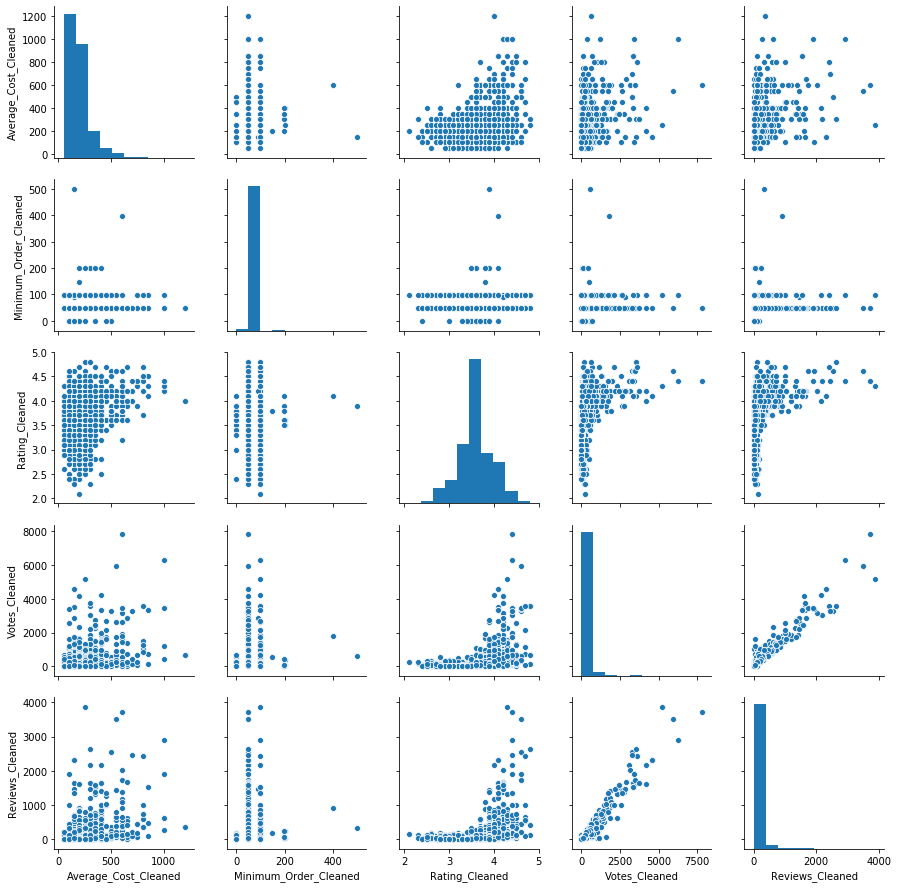

In [50]:
seaborn.pairplot(test_sample)

# Data Preprocessing

After cleaning, there are still some Data-Preparation tasks left. We still have some missing values that we allotted during the feature generation.

In the Preprocessing stage we will perform the following :

Dealing with Nulls/empty cells

Encoding Categorical variables

Scaling the features

Removing Nulls

In [51]:
train_sample.isnull().sum()

Location_Feature_1           0
Location_Feature_2        1942
Location_Feature_3        6364
Location_Feature_4       10068
Cuisines_Feature_1           0
Cuisines_Feature_2        3012
Cuisines_Feature_3        6931
Cuisines_Feature_4        9393
Cuisines_Feature_5       10449
Cuisines_Feature_6       10854
Cuisines_Feature_7       10978
Cuisines_Feature_8       11046
Restaurant                   0
Average_Cost_Cleaned         0
Minimum_Order_Cleaned        0
Rating_Cleaned               0
Votes_Cleaned                0
Reviews_Cleaned              0
Delivery_Time                0
dtype: int64

In [52]:
train_sample.head()

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,Cuisines_Feature_7,Cuisines_Feature_8,Restaurant,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned,Delivery_Time
0,fti college,law college road,pune,NaN,fast food,rolls,burger,salad,wraps,NaN,NaN,NaN,ID_6321,200,50,3.5,12,4,30 minutes
1,sector 3,marathalli,NaN,NaN,ice cream,desserts,NaN,NaN,NaN,NaN,NaN,NaN,ID_2882,100,50,3.5,11,4,30 minutes
2,mumbai central,NaN,NaN,NaN,italian,street food,fast food,NaN,NaN,NaN,NaN,NaN,ID_1595,150,50,3.6,99,30,65 minutes
3,sector 1,noida,NaN,NaN,mughlai,north indian,chinese,NaN,NaN,NaN,NaN,NaN,ID_5929,250,99,3.7,176,95,30 minutes
4,rmz centennial,i gate,whitefield,NaN,cafe,beverages,NaN,NaN,NaN,NaN,NaN,NaN,ID_6123,200,99,3.2,521,235,65 minutes


Since the nulls are present only in the categorical features, in this approach, to make it simple I will just replace all the NaNs with a string 'NAN' and will use it as a added category or class.

In [53]:
train_sample.fillna('NAN', inplace = True)

In [54]:

train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Location_Feature_4       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Cuisines_Feature_6       0
Cuisines_Feature_7       0
Cuisines_Feature_8       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

In [55]:
train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Location_Feature_4       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Cuisines_Feature_6       0
Cuisines_Feature_7       0
Cuisines_Feature_8       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

In [56]:
test_sample.fillna('NAN', inplace = True)

In [57]:
train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Location_Feature_4       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Cuisines_Feature_6       0
Cuisines_Feature_7       0
Cuisines_Feature_8       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

# Encoding Categories

Here we will use a simple Label Encoder to transform all the strings or categories.

Locations & Cuisines

We will first find the unique values or categories in each of the categorical features and fit the label encoder with the unique values. The encoder eill assign an integer code to each of the categories which can be used to tranform the entire categorical feature column.

In [58]:
temp1 = []
for i in train_Cuisines_splits.keys():
  for j in train_Cuisines_splits.get(i):
    temp1.append(j)

temp2 = []
for i in test_Cuisines_splits.keys():
  for j in test_Cuisines_splits.get(i):
    temp2.append(j)

temp1.extend(temp2)

unique_cuisines = list(pd.Series(temp1).unique())
unique_cuisines.append('NAN')

Note: We are also adding an extra category called NAN that we used to replace the NaN values.

In [59]:
len(unique_cuisines)

103

The location is a tricky feature. You can use external data to fill the missing data. For example, if the city is missing you can use the street name and try to find the City for the missing fields.

For simplicity, here I have followed the same approach as I did for Cuisines which is not a perfect solution.

In [60]:

temp1 = []
for i in train_Location_splits.keys():
  for j in train_Location_splits.get(i):
    temp1.append(j)

temp2 = []
for i in test_Location_splits.keys():
  for j in test_Location_splits.get(i):
    temp2.append(j)

temp1.extend(temp2)

unique_locations = list(pd.Series(temp1).unique())
unique_locations.append('NAN')

In [61]:
len(unique_locations)

67

In [62]:
#encoding the categorical Features
from sklearn.preprocessing import LabelEncoder
le_c = LabelEncoder().fit(unique_cuisines)
le_l = LabelEncoder().fit(unique_locations)

In [63]:
for i in train_Location_splits.keys():
  train_sample[i] = le_l.transform(train_sample[i])

In [64]:
for i in train_Cuisines_splits.keys():
  train_sample[i] = le_c.transform(train_sample[i])

In [65]:

for i in train_Location_splits.keys():
  test_sample[i] = le_l.transform(test_sample[i])

In [66]:
for i in test_Cuisines_splits.keys():
  test_sample[i] = le_c.transform(test_sample[i])

Restaurant IDs

We will follow a similar approach for encoding the Restaurant IDs

In [67]:
t1 = list(train_sample['Restaurant'])
t2 = list(test_sample['Restaurant'])

t1.extend(t2)
unique_ids = list(set(t1))

In [68]:
len(unique_ids)

8661

In [69]:

le_id = LabelEncoder().fit(unique_ids)

In [70]:
train_sample['Restaurant'] = le_id.transform(train_sample['Restaurant'])
test_sample['Restaurant'] = le_id.transform(test_sample['Restaurant'])

# Scaling

We will now normalize the data using the StandardScaler

In [71]:

cols = list(train_sample.columns)

In [72]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [73]:

train_sample[cols[:-1]] = ss.fit_transform(train_sample[cols[:-1]])

In [74]:
test_sample[cols[:-1]] = ss.fit_transform(test_sample[cols[:-1]])

In [75]:
train_sample.head()

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,Cuisines_Feature_7,Cuisines_Feature_8,Restaurant,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned,Delivery_Time
0,-0.867166,-0.408678,1.683093,-0.161374,-0.714599,1.656380,0.137213,3.865914,7.460013,-0.125106,-0.08579,-0.057042,0.625956,-0.020864,-0.180293,-0.301852,-0.464423,-0.417345,30 minutes
1,1.246323,-0.117669,-0.660441,-0.161374,-0.312564,-0.125757,-0.621557,-0.359765,-0.205249,-0.125106,-0.08579,-0.057042,-0.897145,-0.791117,-0.180293,-0.301852,-0.466421,-0.417345,30 minutes
2,0.242416,-1.669717,-0.660441,-0.161374,-0.129821,1.953402,0.534663,-0.359765,-0.205249,-0.125106,-0.08579,-0.057042,-1.467013,-0.405990,-0.180293,-0.035808,-0.290596,-0.326311,65 minutes
3,1.140649,0.415848,-0.660441,-0.161374,0.637700,1.326354,0.354004,-0.359765,-0.205249,-0.125106,-0.08579,-0.057042,0.451808,0.364263,2.461158,0.230235,-0.136749,-0.098724,30 minutes
4,0.982137,-0.602684,2.580618,-0.161374,-1.043537,-0.620795,-0.621557,-0.359765,-0.205249,-0.125106,-0.08579,-0.057042,0.538284,-0.020864,2.461158,-1.099981,0.552564,0.391462,65 minutes


In [76]:
test_sample.head()

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,Cuisines_Feature_7,Cuisines_Feature_8,Restaurant,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned
0,0.083713,1.243494,-0.479103,0.871523,0.809765,-0.204497,-0.346423,-0.351099,-0.196822,-0.12173,-0.082445,-0.042516,-0.897086,1.350471,-0.177278,1.612406,0.276837,0.428327
1,0.083713,1.243494,-0.479103,0.871523,-1.302905,0.628995,-0.605296,-0.351099,-0.196822,-0.12173,-0.082445,-0.042516,1.096904,-0.833142,-0.177278,0.029586,0.029087,0.035125
2,1.143599,0.416451,-0.673221,-0.151585,-0.746940,-1.104668,-0.605296,-0.351099,-0.196822,-0.12173,-0.082445,-0.042516,-0.101583,-0.833142,-0.177278,-0.006736,-0.411358,-0.377352
3,-1.665097,0.367801,-0.236455,-0.151585,0.513250,1.362467,0.393217,1.259565,7.241203,-0.12173,-0.082445,-0.042516,0.278454,0.040303,-0.177278,-0.006736,-0.347833,-0.311818
4,1.143599,0.416451,-0.673221,-0.151585,-0.932262,-0.037799,-0.605296,-0.351099,-0.196822,-0.12173,-0.082445,-0.042516,-0.715119,-0.396419,-0.177278,-1.895735,-0.407123,-0.385062



# Modeling

Finally, we are ready for modeling. We will split the training set into training and validation sets.

We will then use the training set to train and validation set to test the performance of the model.

Finally we will use the given test set for predicting.

In [77]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train_sample, test_size = 0.1, random_state = 123)

In [78]:

X_train = train[cols[:-1]]
Y_train = train[cols[-1]]

X_Val = val[cols[:-1]]
Y_Val = val[cols[-1]]

X_test = test_sample[cols[:-1]]

In [79]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,Y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb.score(X_Val,Y_Val)

In [ ]:
Predictions = xgb.predict(X_test)

Lets write the predictions into an excel file for uploading into MachineHack

In [ ]:
pd.DataFrame(Predictions, columns = ['Delivery_Time']).to_excel("Submission_1.xlsx", index = False)